In [1]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

In [2]:
# Step 3: Create obscure sci-fi book list

books = [
    "Slow River",
    "Merchanter's Luck",
    "Engine Summer",
    "Moderan",
    "Waystation",
    "Venus Plus X",
    "Trouble and Her Friends",
    "The Night Land",
    "Woman on the Edge of Time",
    "Dragon's Egg",
    "Passing for Human",
    "Infinity’s Web",
    "Benefits",
    "The Mirror",
    "A Mirror for Observers"
]

authors = [
    "Nicola Griffith",
    "C.J. Cherryh",
    "John Crowley",
    "David R. Bunch",
    "Clifford Simak",
    "Theodore Sturgeon",
    "Melissa Scott",
    "William Hope Hodgson",
    "Marge Piercy",
    "Robert L. Forward",
    "Jody Scott",
    "Sheila Finch",
    "Zoe Fairbairns",
    "Marlys Millheiser",
    "Edgar Pangborn"
]

In [3]:
# Step 4: Generate synthetic sales data

num_books = len(books)

sales_data = {
    "Book": books,
    "Author": authors,
    "Year_Published": np.random.randint(1960, 2015, num_books),
    "Units_Sold": np.random.randint(5000, 150000, num_books),
    "Price_Per_Unit": np.round(np.random.uniform(5, 25, num_books), 2),
    "Cost_Per_Unit": np.round(np.random.uniform(2, 15, num_books), 2)
}

df = pd.DataFrame(sales_data)

# Calculate Revenue, Profit, Profit Margin
df["Revenue"] = df["Units_Sold"] * df["Price_Per_Unit"]
df["Cost"] = df["Units_Sold"] * df["Cost_Per_Unit"]
df["Profit"] = df["Revenue"] - df["Cost"]
df["Profit_Margin"] = (df["Profit"] / df["Revenue"]) * 100

df.head()

,Book,Author,Year_Published,Units_Sold,Price_Per_Unit,Cost_Per_Unit,Revenue,Cost,Profit,Profit_Margin
0,Slow River,Nicola Griffith,1998,21023,12.33,10.90,259213.59,229150.70,30062.89,11.597729
1,Merchanter's Luck,C.J. Cherryh,2011,46090,14.12,7.72,650790.80,355814.80,294976.00,45.325779
2,Engine Summer,John Crowley,1988,72221,20.70,3.59,1494974.70,259273.39,1235701.31,82.657005
3,Moderan,David R. Bunch,1974,69820,8.99,8.44,627681.80,589280.80,38401.00,6.117909
4,Waystation,Clifford Simak,2002,5769,15.28,2.45,88150.32,14134.05,74016.27,83.965969


In [4]:
# Step 5: Add demographic data

age_groups = ["18-25", "26-35", "36-50", "50+"]
genders = ["Male", "Female", "Non-binary"]
regions = ["North America", "Europe", "Asia", "Australia"]

df["Primary_Age_Group"] = np.random.choice(age_groups, num_books)
df["Primary_Gender"] = np.random.choice(genders, num_books)
df["Top_Region"] = np.random.choice(regions, num_books)

df.head()

,Book,Author,Year_Published,Units_Sold,Price_Per_Unit,Cost_Per_Unit,Revenue,Cost,Profit,Profit_Margin,Primary_Age_Group,Primary_Gender,Top_Region
0,Slow River,Nicola Griffith,1998,21023,12.33,10.90,259213.59,229150.70,30062.89,11.597729,26-35,Male,Australia
1,Merchanter's Luck,C.J. Cherryh,2011,46090,14.12,7.72,650790.80,355814.80,294976.00,45.325779,50+,Female,North America
2,Engine Summer,John Crowley,1988,72221,20.70,3.59,1494974.70,259273.39,1235701.31,82.657005,26-35,Non-binary,Australia
3,Moderan,David R. Bunch,1974,69820,8.99,8.44,627681.80,589280.80,38401.00,6.117909,36-50,Male,Australia
4,Waystation,Clifford Simak,2002,5769,15.28,2.45,88150.32,14134.05,74016.27,83.965969,50+,Female,Australia


In [5]:
# Step 6: Save dataset

df.to_csv("obscure_scifi_books_dataset.csv", index=False)

print("Dataset saved successfully.")

Dataset saved successfully.


In [6]:
# Step 7: Summary statistics

df.describe()

,Year_Published,Units_Sold,Price_Per_Unit,Cost_Per_Unit,Revenue,Cost,Profit,Profit_Margin
count,15.000000,15.000000,15.000000,15.000000,1.500000e+01,1.500000e+01,1.500000e+01,15.000000
mean,1987.200000,70296.466667,14.237333,8.806667,1.064474e+06,6.340962e+05,4.303779e+05,23.064307
std,14.760952,45305.796318,6.340183,3.911236,9.832794e+05,5.613522e+05,7.053912e+05,49.870744
min,1967.000000,5769.000000,5.930000,2.450000,5.384165e+04,1.413405e+04,-2.221503e+05,-104.460432
25%,1976.000000,33556.500000,8.700000,5.705000,3.369344e+05,2.442120e+05,3.423195e+04,7.865025
50%,1983.000000,69925.000000,14.120000,8.760000,6.507908e+05,3.937032e+05,7.401627e+04,28.061831
75%,1998.000000,99330.000000,18.925000,11.490000,1.498962e+06,8.428548e+05,5.664470e+05,53.667894
max,2012.000000,135608.000000,24.310000,14.600000,3.251880e+06,1.862040e+06,2.016491e+06,83.965969


In [7]:
# Step 8: Sort by profit

top_profit = df.sort_values(by="Profit", ascending=False)

top_profit[["Book", "Profit", "Profit_Margin"]]

,Book,Profit,Profit_Margin
10,Passing for Human,2016490.96,62.010008
11,Infinity’s Web,1781506.98,81.900452
2,Engine Summer,1235701.31,82.657005
12,Benefits,837918.09,31.034483
1,Merchanter's Luck,294976.00,45.325779
8,Woman on the Edge of Time,255717.80,28.061831
5,Venus Plus X,196147.05,17.982196
4,Waystation,74016.27,83.965969
7,The Night Land,67433.94,38.134111
6,Trouble and Her Friends,39857.25,9.612142


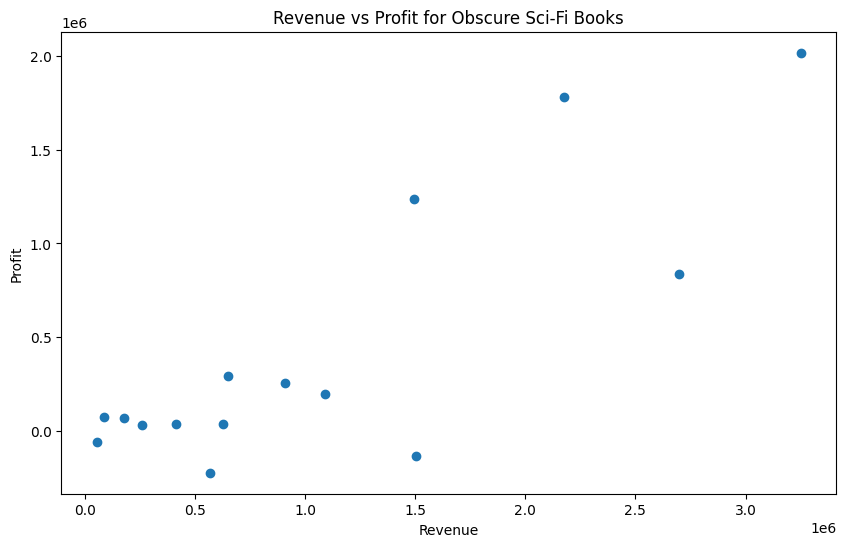

In [8]:
# Step 9: Plot Revenue vs Profit

plt.figure(figsize=(10,6))
plt.scatter(df["Revenue"], df["Profit"])

plt.title("Revenue vs Profit for Obscure Sci-Fi Books")
plt.xlabel("Revenue")
plt.ylabel("Profit")

plt.show()

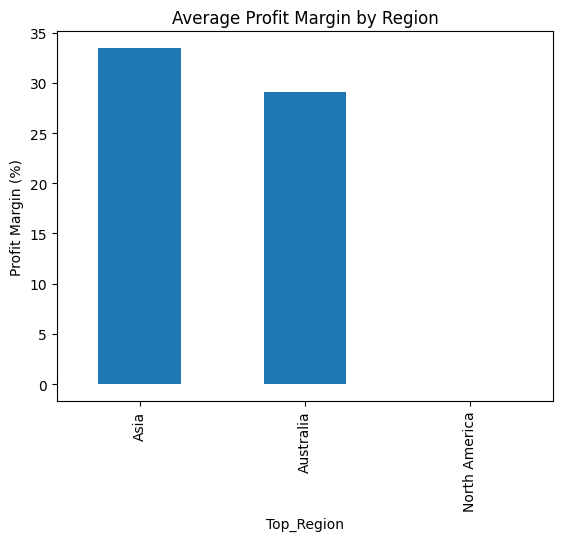

In [9]:
# Step 10: Average profit margin by region

region_profit = df.groupby("Top_Region")["Profit_Margin"].mean()

region_profit.plot(kind="bar")

plt.title("Average Profit Margin by Region")
plt.ylabel("Profit Margin (%)")
plt.show()

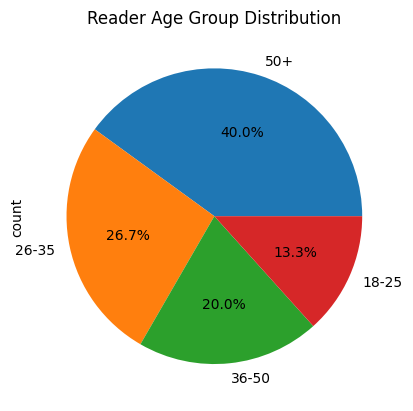

In [10]:
# Step 11: Demographic distribution

age_dist = df["Primary_Age_Group"].value_counts()

age_dist.plot(kind="pie", autopct="%1.1f%%")

plt.title("Reader Age Group Distribution")
plt.show()